In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


In [8]:
df=pd.read_csv("datasetml/datml.csv")

/tmp/ipykernel_16999/549116931.py:1: DtypeWarning: Columns (4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("datasetml/datml.csv")


In [9]:
df.drop(columns="Unnamed: 0",inplace=True)

In [10]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,id,duration_int,duration_type,userId,score,timestamp
0,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,as1,113.0,min,543,5.0,2003-07-30
1,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,as1,113.0,min,595,3.0,1996-08-13
2,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,as1,113.0,min,611,3.0,2001-01-03
3,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,as1,113.0,min,2523,3.5,2012-06-25
4,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,as1,113.0,min,3082,4.0,2000-03-30


Dimension del dataset 

In [11]:
df.shape

(11024289, 17)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11024289 entries, 0 to 11024288
Data columns (total 17 columns):
 #   Column         Dtype  
---  ------         -----  
 0   show_id        object 
 1   type           object 
 2   title          object 
 3   director       object 
 4   cast           object 
 5   country        object 
 6   date_added     object 
 7   release_year   int64  
 8   rating         object 
 9   listed_in      object 
 10  description    object 
 11  id             object 
 12  duration_int   float64
 13  duration_type  object 
 14  userId         int64  
 15  score          float64
 16  timestamp      object 
dtypes: float64(2), int64(2), object(13)
memory usage: 1.4+ GB


Cantidad de nulos

In [13]:
df.isnull().sum()

show_id                0
type                   0
title                  0
director         3960615
cast             2550859
country          5510080
date_added       4577546
release_year           0
rating                 0
listed_in              0
description         1815
id                     0
duration_int      231117
duration_type     231117
userId                 0
score                  0
timestamp              0
dtype: int64

In [14]:
df.describe()

,release_year,duration_int,userId,score
count,1.102429e+07,1.079317e+07,1.102429e+07,1.102429e+07
mean,2.010819e+03,6.710623e+01,8.997251e+04,3.533455e+00
std,1.538663e+01,5.140062e+01,8.686601e+04,1.059692e+00
min,1.920000e+03,0.000000e+00,1.000000e+00,5.000000e-01
25%,2.010000e+03,3.000000e+00,2.855800e+04,3.000000e+00
50%,2.016000e+03,8.400000e+01,5.684300e+04,3.500000e+00
75%,2.019000e+03,1.020000e+02,1.168670e+05,4.000000e+00
max,2.021000e+03,6.010000e+02,2.708960e+05,5.000000e+00


Valores por año de menor a mayor

In [18]:
df.timestamp.astype("datetime64")
df.timestamp.sort_values().value_counts


<bound method IndexOpsMixin.value_counts of 9292297     1995-01-09
8400936     1995-01-09
9342593     1995-01-09
5835259     1995-01-09
8995953     1996-01-29
               ...    
37750       2017-08-04
10752097    2017-08-04
8586015     2017-08-04
7614931     2017-08-04
5638236     2017-08-04
Name: timestamp, Length: 11024289, dtype: object>

Seleciono los rating con una fecha mayor al 2010

In [20]:
df=df[df["timestamp"]>"2010-01-01"]

distribucion de valores de ratings

In [21]:
df.score.value_counts()

4.0    938861
3.5    681686
3.0    584469
5.0    515058
4.5    483464
2.5    256796
2.0    190613
0.5     90639
1.0     82255
1.5     77583
Name: score, dtype: int64

Selecciono las columnas de interes para mi modelo de machine learning y descarto las series para mi modelo de recomendacion

In [23]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'listed_in', 'description', 'id',
       'duration_int', 'duration_type', 'userId', 'score', 'timestamp'],
      dtype='object')

In [24]:
df=df[df["type"]=="movie"]

In [25]:
df_prueba=df[['title','id','userId', 'score']]

cantidad de score por pelicula

Text(0.5, 1.0, 'cantidad de score por pelicula')

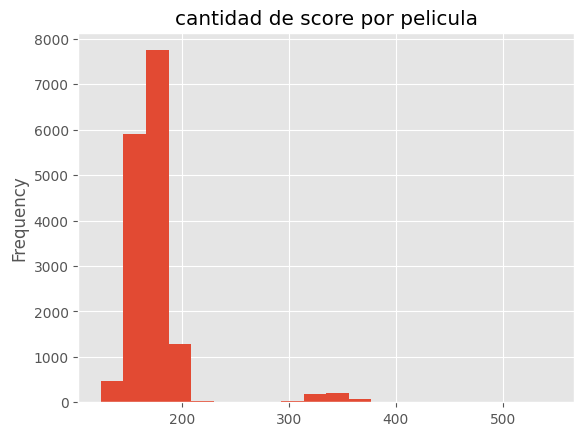

In [26]:
df_prueba.title.value_counts().plot(kind="hist",bins=20)
plt.title("cantidad de score por pelicula")
### no hay peliculas con una cantidad baja de scores

cantidad de criticas por usuarios

In [27]:
filtro=df_prueba.userId.value_counts().to_frame().reset_index().rename(columns={"userId":"countUser","index":"userId"})

In [28]:
df_prueba2=pd.merge(df_prueba,filtro,on="userId")

Text(0.5, 1.0, 'cantidad de peliculas criticadas por usuarios')

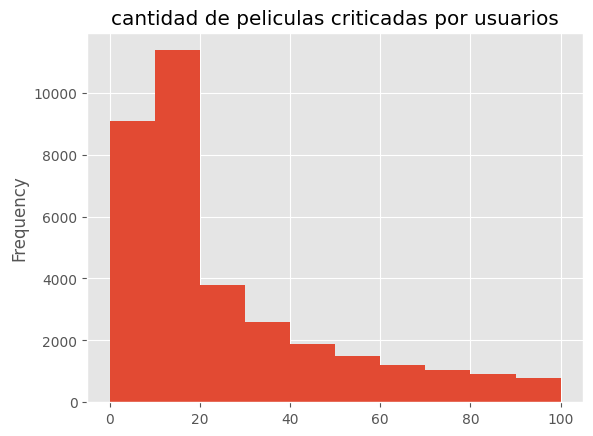

In [29]:
df_prueba2.userId.value_counts().sort_values().plot(kind="hist",range=[0,100])
plt.title("cantidad de peliculas criticadas por usuarios")

seleciono los usuarios que realizaron criticas a mas de 50 peliculas

<Axes: ylabel='Frequency'>

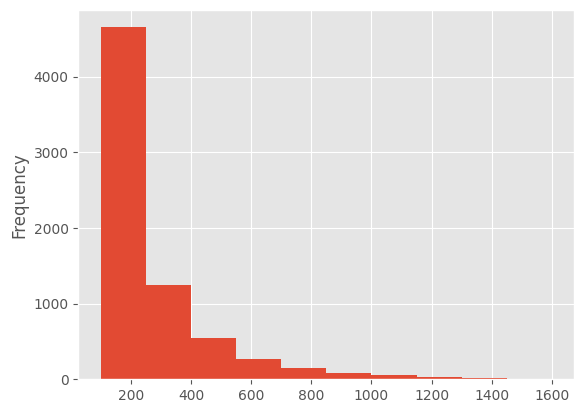

In [33]:
df_prueba2[df_prueba2["countUser"]>50].userId.value_counts().sort_values().plot(kind="hist",range=[100,1600])


In [34]:
df_ml=df_prueba2[df_prueba2["countUser"]>50]

In [35]:
df_ml

,title,id,userId,score,countUser
0,the grand seduction,as1,2523,3.5,234
1,elon musk: the real life iron man,as15,2523,3.5,234
2,world war ii: saving the reality,as69,2523,4.0,234
3,ufotv presents the day before disclosure,as238,2523,4.0,234
4,the wedding night,as400,2523,4.5,234
...,...,...,...,...,...
2748513,kanika,ns7169,15556,3.0,56
2748514,ocean's twelve,ns7640,15556,3.5,56
2748515,superfly,ns8128,15556,1.0,56
2748516,the model,ns8426,15556,2.0,56


guardo el dataset en formato parquet para el modelo de machine learning

In [36]:
df_ml.to_parquet("datasetml/df_mlfinal.parquet")